In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path=""
X =pd.read_csv(path+"Xtr.csv", header=None)
Y =pd.read_csv(path+"Ytr.csv")

In [13]:
print("Training set has {0[0]} rows and {0[1]} columns".format(X.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(Y.shape))

Training set has 5000 rows and 784 columns
Test set has 5000 rows and 2 columns


In [13]:
X_train = X.values

In [14]:
y_train = Y["Prediction"]

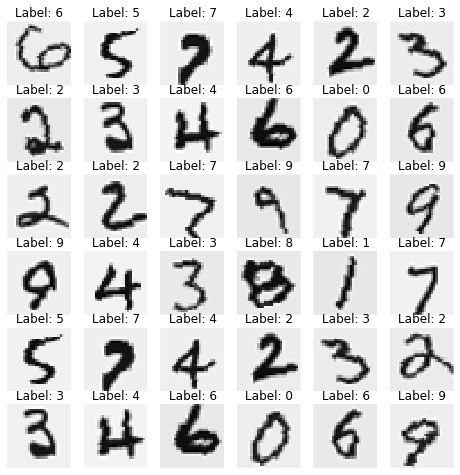

In [27]:
figs, axes = plt.subplots(6, 6, figsize=(8, 8))
for i in range(6):
    for j in range(6):
        axes[i, j].imshow(-X_train[i + 4 * j].reshape(28, 28).T, cmap='gray', interpolation='none')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_title("Label: {}".format(y_train[i + 4 * j]))
        axes[i, j].axis('off')

In [39]:
from sklearn import cross_validation
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
scores = []
for k in range(50,500,100):
    estimators = [('reduce_dim', PCA(n_components= k)), ('svm', SVC())]
    clf = Pipeline(estimators)
    scores.append(cross_validation.cross_val_score(clf, X_train, y_train ).mean())
    print cross_validation.cross_val_score(clf, X_train, y_train ).mean()

0.92679719602
0.889997757221
0.871192839757
0.861793138778
0.854593838917


In [40]:
from sklearn import cross_validation
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
scores = []
for k in range(10,150,10):
    estimators = [('reduce_dim', PCA(n_components= k)), ('svm', SVC())]
    clf = Pipeline(estimators)
    scores.append(cross_validation.cross_val_score(clf, X_train, y_train ).mean())
    print cross_validation.cross_val_score(clf, X_train, y_train ).mean()

0.873200122691
0.923195034002
0.929396563439
0.928596480336
0.92679719602
0.921996223351
0.915798292486
0.910997325001
0.907194598533
0.904995392906
0.900194183212
0.898194817137
0.892197442081
0.891197759908


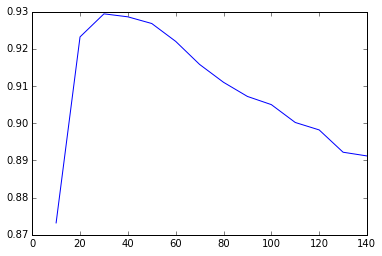

In [42]:
plt.plot(range(10,150,10),scores)

In [44]:
from sklearn import cross_validation
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
scores = []
for k in range(25,40,1):
    estimators = [('reduce_dim', PCA(n_components= k)), ('svm', SVC())]
    clf = Pipeline(estimators)
    scores.append(cross_validation.cross_val_score(clf, X_train, y_train ).mean())
    print cross_validation.cross_val_score(clf, X_train, y_train ).mean()

0.927596320656
0.927996241968
0.927597519604
0.928198960376
0.930198084243
0.929396563439
0.928998081556
0.929795045321
0.927996238512
0.92959640299
0.929597601938
0.929996082092
0.930796644429
0.92999728104
0.928996401647


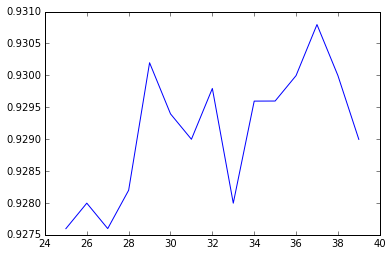

In [45]:
plt.plot(range(25,40,1),scores)

In [6]:
from dimreduction import rbfpca

/home/asus/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


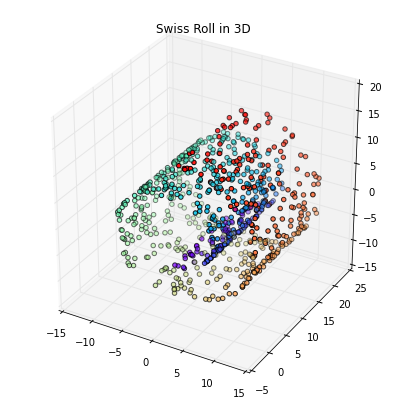

In [7]:
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()


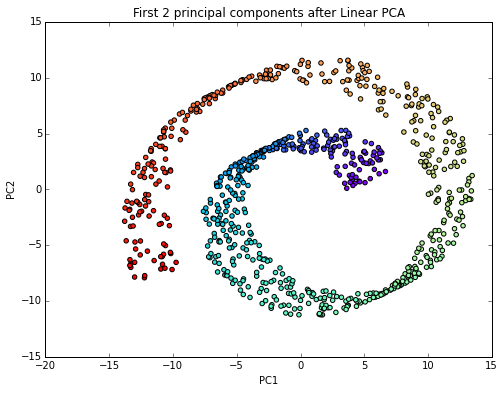

In [8]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [9]:
reducer = rbfpca(n_components = 2, gamma = 0.1)

In [10]:
X_pc = reducer.fit_transform(X)

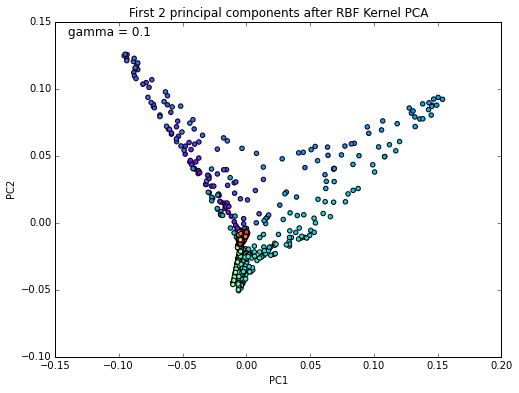

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[:, 0], X_pc[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.14, 0.14, 'gamma = 0.1', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()